### Thyroid Disease Detection

**Problem Statement:** Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism. The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For classification problems

    Check Null Values
    Check Balance Data


In [3]:
df = pd.read_csv('datafiles/hypothyroid.csv')
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.shape

(3772, 30)

In [5]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


**Need to remove ? from the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [7]:
df["binaryClass"].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

**Need to generate some N values to balance the dataset**

In [8]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

**replace t and f values with 1 and 0 respectively**

In [9]:
df=df.replace({"t":1,"f":0})

**replace ? with np.NAN in the dataset**

In [10]:
df=df.replace({"?":np.NAN})

In [11]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,0


In [12]:
len(df.columns),df.columns

(30,
 Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
        'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
        'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
        'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
        'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
        'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
        'binaryClass'],
       dtype='object'))

In [13]:
numerical_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns

In [14]:
len(numerical_cols), numerical_cols

(22,
 Index(['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
        'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
        'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
        'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured',
        'T4U measured', 'FTI measured', 'TBG measured', 'TBG', 'binaryClass'],
       dtype='object'))

In [15]:
len(categorical_cols), categorical_cols

(8,
 Index(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral source'], dtype='object'))

In [16]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [17]:
def printvalues(col):
    print(f"{col}")
    print(f"{df[col].value_counts()}")
    print(f"Total Null Values: {df[col].isnull().sum()}")
    print("*"*15)

In [18]:
for cat in categorical_cols:
    printvalues(cat)

age
age
59     95
60     91
70     90
73     81
55     81
       ..
10      1
4       1
5       1
455     1
6       1
Name: count, Length: 93, dtype: int64
Total Null Values: 1
***************
sex
sex
F    2480
M    1142
Name: count, dtype: int64
Total Null Values: 150
***************
TSH
TSH
0.2     116
1.3     105
1.1      97
1.4      91
1.5      80
       ... 
86        1
18.4      1
89        1
29        1
40        1
Name: count, Length: 287, dtype: int64
Total Null Values: 369
***************
T3
T3
2      238
1.8    207
2.2    201
1.9    189
2.1    184
      ... 
6.7      1
7.3      1
4.6      1
5.2      1
6.6      1
Name: count, Length: 69, dtype: int64
Total Null Values: 769
***************
TT4
TT4
101    71
93     67
98     63
103    63
102    59
       ..
289     1
240     1
43      1
34      1
258     1
Name: count, Length: 241, dtype: int64
Total Null Values: 231
***************
T4U
T4U
0.99    95
0.9     93
1.01    91
1       90
0.92    89
        ..
1.84     1
0.57     1


In [19]:
df=df.replace({"F":1,"M":0})

In [20]:
df["referral source"].value_counts()

referral source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

In [21]:
del df["referral source"]

In [22]:
df["TBG measured"].value_counts()

TBG measured
0    3772
Name: count, dtype: int64

In [23]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
T

In [24]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
T

In [25]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
binaryClass                     0
dtype: int64

In [26]:
df["TBG"].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
del df["TBG"]

In [28]:
cols

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [30]:
df['age'] = imputer.fit_transform(df[['age']])
#
df['T4U measured'] = imputer.fit_transform(df[['T4U measured']])

df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])


In [31]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [32]:
df.isnull().sum().sum()

0

In [33]:
df.to_csv('datafiles/hypothyroid_train.csv',index=False)

In [34]:
df = pd.read_csv('datafiles/hypothyroid_train.csv')
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1.0,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0.0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1.0,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0.0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1.0,0.870,1,70.000000,0,0


In [35]:
df.isnull().sum().sum()

0

In [36]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

<Axes: xlabel='age', ylabel='Density'>

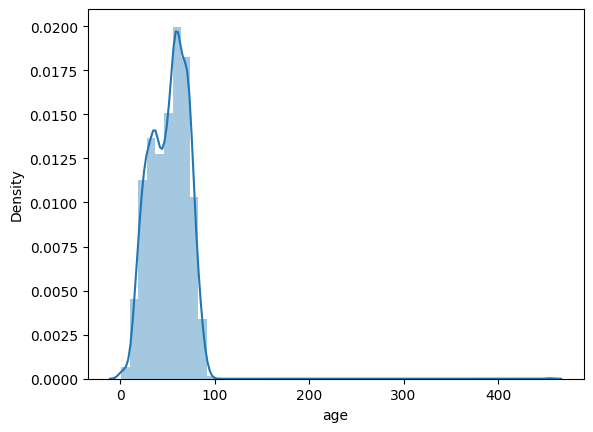

In [37]:
sns.distplot(df['age'])

<Axes: xlabel='sex', ylabel='Density'>

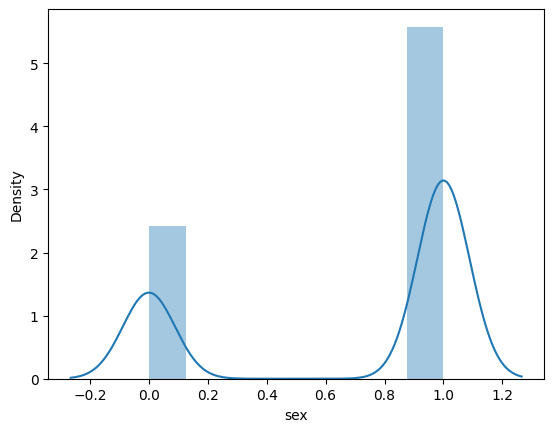

In [38]:
sns.distplot(df['sex'])

<Axes: xlabel='T3', ylabel='Density'>

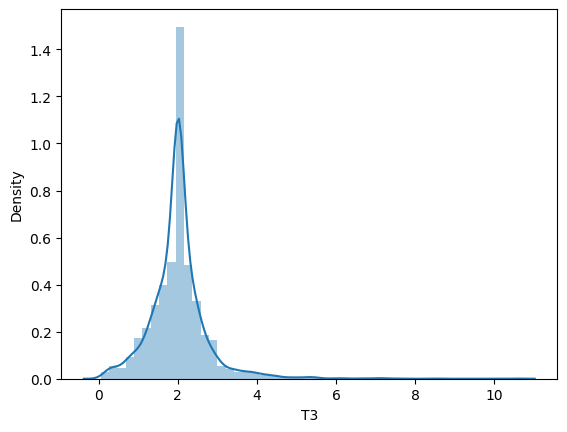

In [39]:
sns.distplot(df['T3'])

<Axes: xlabel='TT4', ylabel='Density'>

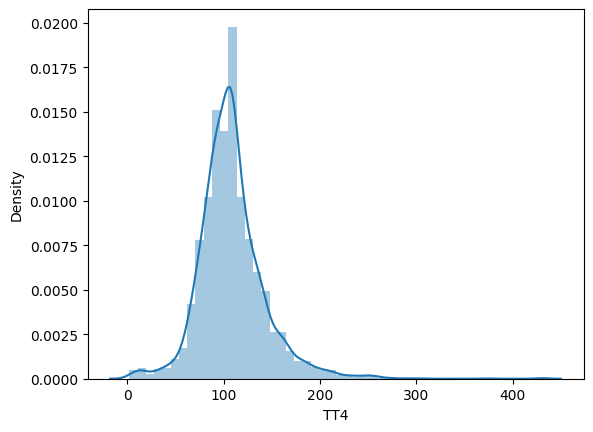

In [40]:
sns.distplot(df['TT4'])

<Axes: xlabel='T4U', ylabel='Density'>

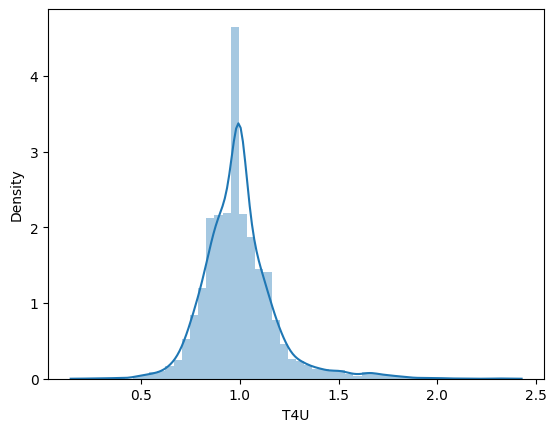

In [41]:
sns.distplot(df['T4U'])

<Axes: xlabel='FTI', ylabel='Density'>

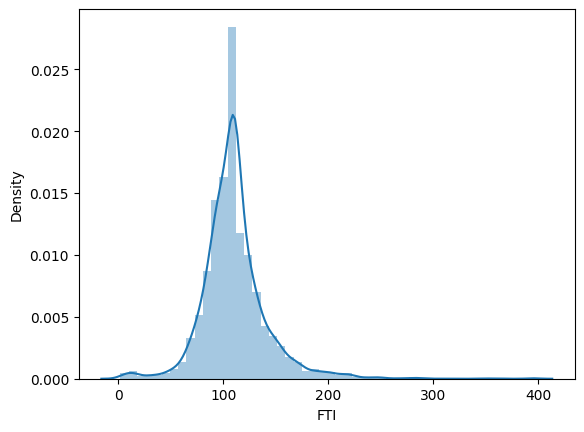

In [42]:
sns.distplot(df['FTI'])

<Axes: xlabel='TBG measured', ylabel='Density'>

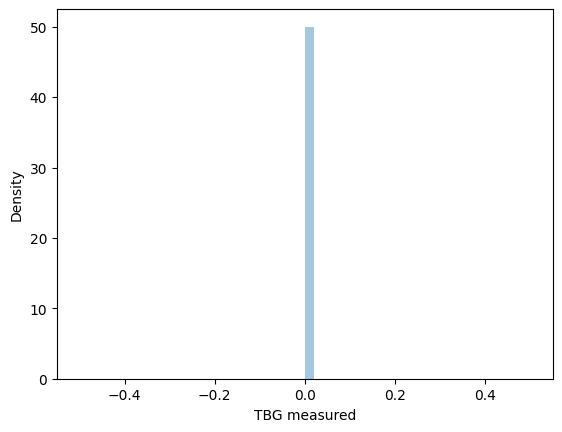

In [43]:
sns.distplot(df['TBG measured'])

<Axes: xlabel='age'>

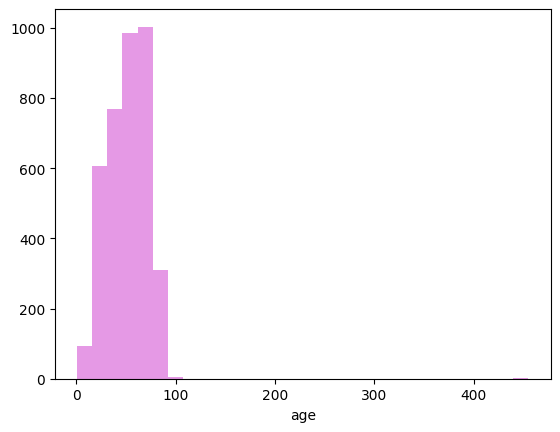

In [44]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

<Axes: xlabel='binaryClass', ylabel='count'>

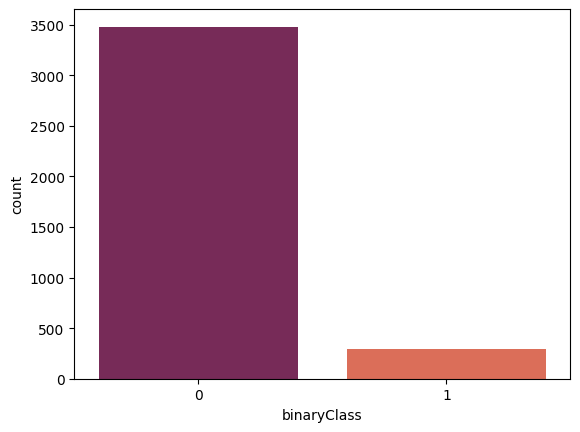

In [45]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

<Axes: xlabel='binaryClass', ylabel='count'>

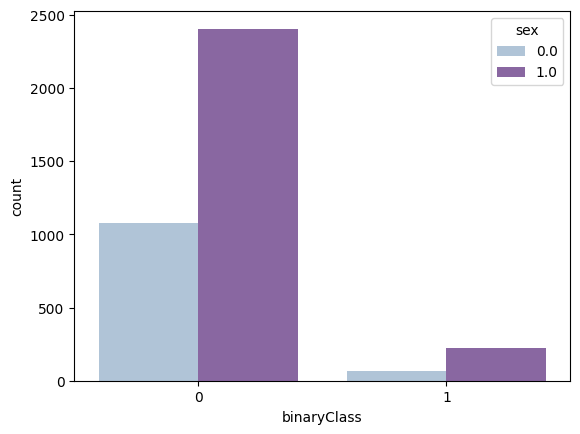

In [46]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

<Axes: xlabel='binaryClass', ylabel='age'>

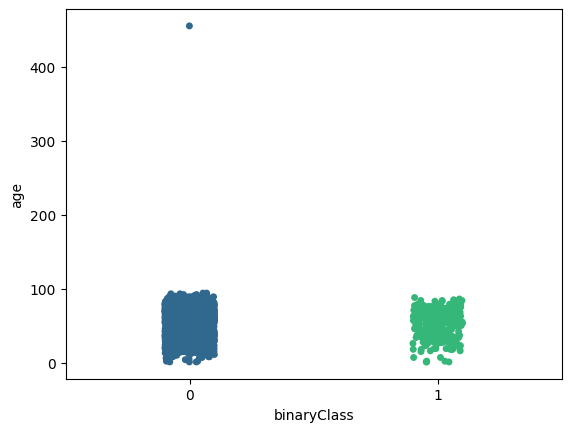

In [47]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

<Axes: xlabel='binaryClass', ylabel='age'>

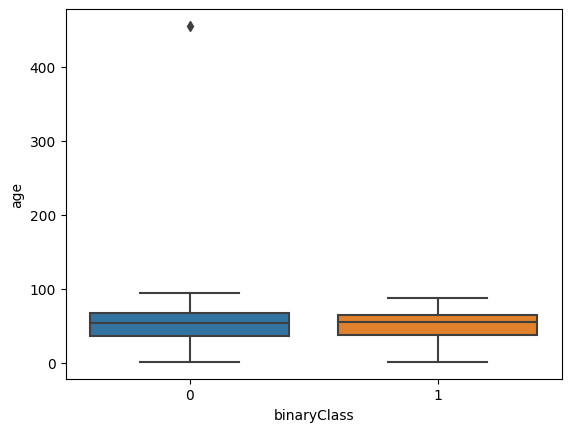

In [48]:
sns.boxplot(x='binaryClass', y='age', data=df)

In [49]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.000154,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,-0.003174
sex,0.000154,1.000000,0.095709,-0.044712,0.027278,-0.007438,0.078665,0.034543,0.022612,0.042687,...,-7.135524e-02,6.421320e-02,-7.685721e-02,1.675458e-01,-5.166161e-02,2.218835e-01,-5.253222e-02,4.189999e-02,NaN,0.049960
on thyroxine,0.014563,0.095709,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,-0.081060
query on thyroxine,-0.017870,-0.044712,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,-0.007448
on antithyroid medication,-0.063881,0.027278,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,-0.021689
sick,0.079468,-0.007438,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,-0.001749
pregnant,-0.113521,0.078665,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,-0.034516
thyroid surgery,-0.029502,0.034543,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,-0.017633
I131 treatment,0.052704,0.022612,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,0.003590
query hypothyroid,0.039562,0.042687,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,0.086282


<Axes: >

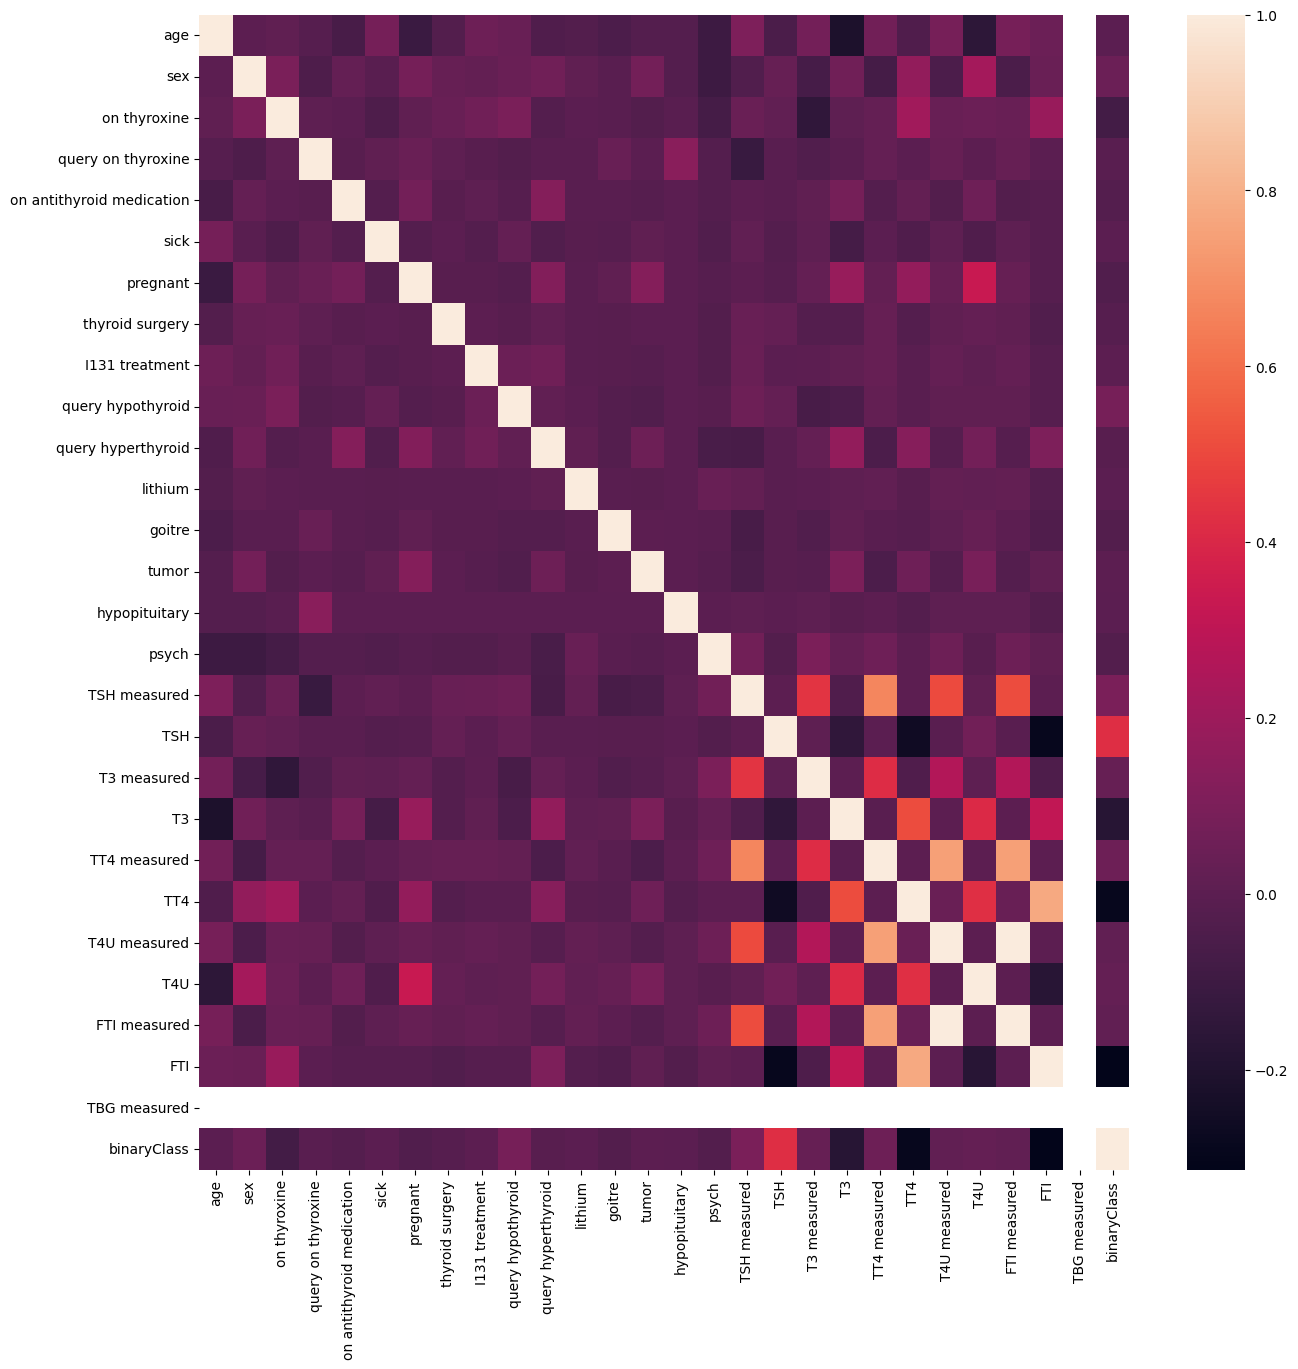

In [50]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr)

In [51]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [54]:
x_train[0]

array([-1.25724849,  0.66254235, -0.37144669, -0.11823068, -0.10696181,
       -0.20208625, -0.11668415, -0.11353134, -0.12569377, -0.25912251,
       -0.26298479, -0.07052203, -0.09053575, -0.16275031, -0.01880444,
       -0.22472494,  0.32615128, -0.12074446,  0.49790031, -0.01562478,
        0.25126512,  0.75997109,  0.33796183,  1.19009127,  0.33666185,
        0.01223448,  0.        ])

In [55]:
x_test[0]

array([-1.25724849,  0.66254235, -0.37144669, -0.11823068, -0.10696181,
       -0.20208625, -0.11668415, -0.11353134, -0.12569377, -0.25912251,
       -0.26298479, -0.07052203, -0.09053575, -0.16275031, -0.01880444,
       -0.22472494,  0.32615128, -0.12908581,  0.49790031,  0.25156559,
        0.25126512, -0.38131003,  0.33796183,  0.03573321,  0.33666185,
       -0.49086425,  0.        ])

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import cross_val_score, KFold

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
predicted = model.predict(x_test)

In [59]:
metrics.accuracy_score(y_test,predicted)

0.9692470837751855

In [60]:
metrics.confusion_matrix(y_test,predicted)

array([[877,   1],
       [ 28,  37]])

In [61]:
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       878\n           1       0.97      0.57      0.72        65\n\n    accuracy                           0.97       943\n   macro avg       0.97      0.78      0.85       943\nweighted avg       0.97      0.97      0.97       943\n'

In [62]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       878
           1       0.97      0.57      0.72        65

    accuracy                           0.97       943
   macro avg       0.97      0.78      0.85       943
weighted avg       0.97      0.97      0.97       943



In [63]:
scores = cross_val_score(LogisticRegression(), x_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.96466431, 0.9540636 , 0.96113074, 0.96113074, 0.96466431,
        0.96819788, 0.95759717, 0.97173145, 0.95053004, 0.96453901]),
 0.9618249254442022)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

best_model = grid_search.fit(x_train, y_train)

In [66]:
best_model.best_params_

{'C': 100}

In [67]:
model2 = LogisticRegression(C=100)
model2.fit(x_train, y_train)

LogisticRegression(C=100)

In [68]:
predicted = model.predict(x_test)

In [69]:
metrics.accuracy_score(y_test,predicted)

0.9692470837751855

In [70]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [71]:
sm = SMOTE(random_state = 2)
x_test_res, y_test_res = sm.fit_resample(x_test, y_test.ravel())

In [72]:
x_train_res.shape, x_train.shape

((5206, 27), (2829, 27))

In [73]:
y_train_res.shape, y_train.shape

((5206,), (2829,))

In [74]:
zeros = 0
ones = 0
for item in y_train_res:
    if item == 1:
        ones += 1
    else:
        zeros += 1
        
print('zeros:',zeros)
print('ones:',ones)

zeros: 2603
ones: 2603


In [75]:
lr = LogisticRegression()
model_res = lr.fit(x_train_res, y_train_res)

In [76]:
scores = cross_val_score(lr, x_train_res, y_train_res, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.97504798, 0.99232246, 0.98848369, 0.98272553, 0.99424184,
        0.9865643 , 0.98653846, 0.98846154, 0.98076923, 0.98269231]),
 0.9857847335006642)

In [77]:
predicted_res = model.predict(x_test_res)

In [78]:
metrics.accuracy_score(y_test_res,predicted_res)

0.8080865603644647

In [79]:
params = [{'learning_rate':[0.01,0.001],
            'max_depth': [3,5,10],
            'n_estimators':[10,50,100,200]}]

In [80]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,params,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train_res,y_train_res)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.991 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.994 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.994 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.996 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.995 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.993 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.996 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.996 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.994 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.995 total t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid=[{'learning_rate': [0.01, 0.001],
                          'max_depth': [3, 5, 10],
                          'n_estimators': [10, 50, 100, 200]}],
             scoring='accuracy', verbose=3)

In [81]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [82]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=200)
XBC.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
XBC.score(x_test_res,y_test_res)

0.9988610478359908

In [84]:
y_pred = XBC.predict(x_test_res)

In [85]:
metrics.accuracy_score(y_test_res,y_pred)

0.9988610478359908

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
print(f"Train_model_score: {rfr.score(x_train,y_train)}")
print(f"Test_model_score: {rfr.score(x_test,y_test)}")

Train_model_score: 0.9928308160427552
Test_model_score: 0.984167117574908


In [88]:
grid_params = {"n_estimators" : [10,100],
              "max_depth" : range(2,10,1),
              "max_features" : ['log2']
              }

In [89]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)

In [90]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
grid_search.best_params_

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 10}

In [ ]:
rfr2 = RandomForestRegressor(n_estimators=100,max_depth=10,max_features='log2')

In [ ]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2')

In [ ]:
rfr2.score(x_test,y_test)

0.8837919470333327

In [ ]:
y_pred = rfr2.predict(x_test)

In [ ]:
#### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.9968186638388123

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
Accuracy_score

0.9968186638388123

In [ ]:
con_matrix = metrics.confusion_matrix(y_test,y_pred)
con_matrix

array([[877,   1],
       [  2,  63]], dtype=int64)

In [ ]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'splitter' : ['best', 'random']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}


0.9964651802745552

In [ ]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth =4, splitter ='best')
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
dtc2.score(x_test,y_test)

0.9989395546129375